In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from time import gmtime, strftime 
from pylab import rcParams
import statsmodels.api as sm
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product

In [2]:
invoice = pd.read_csv("Final_invoice.csv",low_memory=False)

In [3]:
invoice['Month-Year'] = pd.to_datetime(invoice['Invoice Date']).dt.strftime('20%y-%m')

In [8]:
revenue_model = invoice.groupby(['Model','Month-Year']).agg({'Total Amt Wtd Tax.':['mean','count']})

In [9]:
revenue_model

Total Amt Wtd Tax.      
                               mean count
Model Month-Year                         
207   2013-02              0.000000     1
      2013-04            399.560000     1
      2013-06          29459.690000     1
      2013-10           1916.330000     1
      2014-01           4386.080000     1
...                             ...   ...
ZEST  2016-06           1389.913571    28
      2016-07           1607.420250    40
      2016-08           6648.588571    35
      2016-09           2311.371333    30
      2016-10           4888.993636    55

[7506 rows x 2 columns]

In [10]:
revenue_model.columns = revenue_model.columns.droplevel()

In [11]:
revenue_model['Revenue'] = revenue_model['mean'] * revenue_model['count']

In [12]:
revenue_model

mean  count    Revenue
Model Month-Year                                
207   2013-02         0.000000      1       0.00
      2013-04       399.560000      1     399.56
      2013-06     29459.690000      1   29459.69
      2013-10      1916.330000      1    1916.33
      2014-01      4386.080000      1    4386.08
...                        ...    ...        ...
ZEST  2016-06      1389.913571     28   38917.58
      2016-07      1607.420250     40   64296.81
      2016-08      6648.588571     35  232700.60
      2016-09      2311.371333     30   69341.14
      2016-10      4888.993636     55  268894.65

[7506 rows x 3 columns]

In [13]:
model_data = revenue_model.round(1).pivot_table(index = ['Month-Year'], columns = ['Model'], values = ['Revenue'], fill_value=0, aggfunc='sum').reset_index()

In [14]:
model_data.head()

Month-Year Revenue                                                       \
Model                207 3 SERIES 5 SERIES    500 6 SERIES 7 SERIES       800   
0        2012-04     0.0      0.0      0.0    0.0      0.0      0.0  123133.5   
1        2012-05     0.0      0.0    399.6    0.0      0.0      0.0  121783.2   
2        2012-06     0.0      0.0      0.0    0.0      0.0      0.0  118818.7   
3        2012-07     0.0      0.0   5550.0    0.0      0.0      0.0  201496.6   
4        2012-08     0.0      0.0      0.0  299.9      0.0      0.0  164450.2   

                       ...                                                  \
Model   A STAR     A4  ...   X5 XCENT XENON XT XUV 500      XYLO YETI   Z4   
0       7854.8  315.1  ...  0.0   0.0      0.0     0.0  289312.7  0.0  0.0   
1       2392.9    0.0  ...  0.0   0.0      0.0   700.5  227977.1  0.0  0.0   
2      11251.8    0.0  ...  0.0   0.0      0.0     0.0  250102.1  0.0  0.0   
3      13606.9  349.7  ...  0.0   0.0      0.0     0.0  455016.2  0.0  0.0   
4       8840.4    0.0  ...  0.0   0.0      0.0  4210.5  179911.4  0.0  0.0   

                                 
Model       ZEN ZEN ESTILO ZEST  
0       79027.8    33912.5  0.0  
1       54073.9     9911.7  0.0  
2      161056.6    25037.4  0.0  
3      144173.0    38187.4  0.0  
4      132799.3    45499.5  0.0  

[5 rows x 246 columns]

In [15]:
model_data.columns = model_data.columns.droplevel()

In [16]:
model_data.rename(columns={'':'Month-Year'},inplace=True)

In [17]:
model_data.head()

Model,Month-Year,207,3 SERIES,5 SERIES,500,6 SERIES,7 SERIES,800,A STAR,A4,...,X5,XCENT,XENON XT,XUV 500,XYLO,YETI,Z4,ZEN,ZEN ESTILO,ZEST
0,2012-04,0.0,0.0,0.0,0.0,0.0,0.0,123133.5,7854.8,315.1,...,0.0,0.0,0.0,0.0,289312.7,0.0,0.0,79027.8,33912.5,0.0
1,2012-05,0.0,0.0,399.6,0.0,0.0,0.0,121783.2,2392.9,0.0,...,0.0,0.0,0.0,700.5,227977.1,0.0,0.0,54073.9,9911.7,0.0
2,2012-06,0.0,0.0,0.0,0.0,0.0,0.0,118818.7,11251.8,0.0,...,0.0,0.0,0.0,0.0,250102.1,0.0,0.0,161056.6,25037.4,0.0
3,2012-07,0.0,0.0,5550.0,0.0,0.0,0.0,201496.6,13606.9,349.7,...,0.0,0.0,0.0,0.0,455016.2,0.0,0.0,144173.0,38187.4,0.0
4,2012-08,0.0,0.0,0.0,299.9,0.0,0.0,164450.2,8840.4,0.0,...,0.0,0.0,0.0,4210.5,179911.4,0.0,0.0,132799.3,45499.5,0.0


In [18]:
model_data['Total_Revenue'] =  model_data.iloc[:,1:].sum(axis=1)

In [19]:
model_data.head()

Model,Month-Year,207,3 SERIES,5 SERIES,500,6 SERIES,7 SERIES,800,A STAR,A4,...,XCENT,XENON XT,XUV 500,XYLO,YETI,Z4,ZEN,ZEN ESTILO,ZEST,Total_Revenue
0,2012-04,0.0,0.0,0.0,0.0,0.0,0.0,123133.5,7854.8,315.1,...,0.0,0.0,0.0,289312.7,0.0,0.0,79027.8,33912.5,0.0,8074167.1
1,2012-05,0.0,0.0,399.6,0.0,0.0,0.0,121783.2,2392.9,0.0,...,0.0,0.0,700.5,227977.1,0.0,0.0,54073.9,9911.7,0.0,8722166.6
2,2012-06,0.0,0.0,0.0,0.0,0.0,0.0,118818.7,11251.8,0.0,...,0.0,0.0,0.0,250102.1,0.0,0.0,161056.6,25037.4,0.0,9583730.5
3,2012-07,0.0,0.0,5550.0,0.0,0.0,0.0,201496.6,13606.9,349.7,...,0.0,0.0,0.0,455016.2,0.0,0.0,144173.0,38187.4,0.0,10232167.4
4,2012-08,0.0,0.0,0.0,299.9,0.0,0.0,164450.2,8840.4,0.0,...,0.0,0.0,4210.5,179911.4,0.0,0.0,132799.3,45499.5,0.0,8917274.6


In [ ]:
#model_data.to_csv('model data.csv')

In [20]:
Time_Series_data = model_data[['Total_Revenue','Month-Year']].sort_values(by = 'Month-Year')
Time_Series_data['Month-Year'] = pd.to_datetime(Time_Series_data['Month-Year'])
Time_Series_data.set_index('Month-Year',inplace=True)

In [21]:
Time_Series_data

Model,Total_Revenue
Month-Year,
2012-04-01,8074167.1
2012-05-01,8722166.6
2012-06-01,9583730.5
2012-07-01,10232167.4
2012-08-01,8917274.6
2012-09-01,8881355.6
2012-10-01,9885588.7
2012-11-01,11632366.2
2012-12-01,11014743.4


In [22]:
result = sm.tsa.seasonal_decompose(Time_Series_data['Total_Revenue'], model='multiplicative')

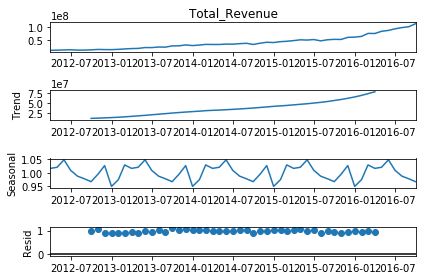

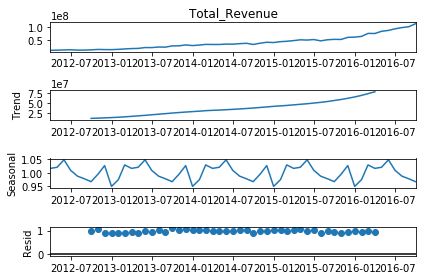

In [23]:
result.plot()

In [24]:
x =  Time_Series_data['Total_Revenue'].values

In [30]:
p=d=q=range(0,2)

In [31]:
pdq=list(product(p,d,q))

In [32]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

In [33]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(x, order=param, seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:2065.3236148461274
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1609.9098534311702
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1549.2533455372347
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:2972.291943475707
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1501.4727392728948
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1471.0059252568303
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1110.6784780066507
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:2970.233339509199
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:82654914.83616269
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1671.1860541817784
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:1487.5526038661303
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:2982.0995023606547
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:1778.42724132156
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1671.9184307948037
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:1123.7057358676127
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:2980.9723336708553
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1759.4992198980287
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1377.7222999522446
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AI

In [34]:
sarima = SARIMAX(x,order=(0,0,0),seasonal_order = (0, 7, 0, 12))
sarima_fit = sarima.fit()